# Домашнее задание №12. Деревья решений

## Задание 1
Представьте, что вы преподаете на курсе по искуственному интеллекту. Пришло время зачета. Вы провели тест, по результатам которого определили, знает или не знает студент каждую из пройденных тем. Однако времени придумывать критерии зачета у вас не было, поэтому вы просто поставили зачеты и незачеты случайным образом. Результаты вы записали в табличку в файле `dt-1.xlsx`.

Когда студенты узнали результаты, они почему-то возмутились, и просят вас объяснить, по каким критериям выставлялся зачет.

Менять данные уже поздно, поэтому придется подгонять критерии под них. От вас требуется построить дерево решений, соответствующее результатам, и вывести его. А также определить три темы, оказывающие наибольшее влияние на выставление зачета (чтобы студенты знали, по каким темам надо лучше подготовиться к пересдаче).

In [ ]:
# Напишите свой код в данной ячейке
import pandas as pd
task1 = pd.read_excel("dt-1.xlsx")
task1.head()

,Имя,Представление знаний,Нечеткая логика,Генетические алгоритмы,Перцептрон,Нейронные сети,Линейная регрессия,Логистическая регрессия,Классификация,Решающие деревья,Отбор признаков,Результат
0,Петрова Алиса,-,+,-,+,-,+,-,+,-,-,Незачет
1,Кузина Анастасия,-,-,+,+,-,+,-,+,+,+,Незачет
2,Морозова Дарья,+,-,+,-,+,-,-,+,-,-,Зачет
3,Смирнова Анна,+,-,-,-,+,+,+,+,-,+,Незачет
4,Смирнов Григорий,-,-,+,-,-,-,-,+,+,-,Незачет


In [ ]:
X = task1.drop('Результат', axis=1).copy()
X = X.drop('Имя', axis=1).copy()
X.head()
X = X.replace({"+": 1, "-": 0})
print(X)

    Представление знаний  Нечеткая логика  Генетические алгоритмы  Перцептрон  \
0                      0                1                       0           1   
1                      0                0                       1           1   
2                      1                0                       1           0   
3                      1                0                       0           0   
4                      0                0                       1           0   
5                      0                1                       1           0   
6                      0                1                       0           0   
7                      0                1                       1           1   
8                      1                1                       0           1   
9                      0                1                       0           1   
10                     0                0                       1           0   
11                     0    

<ipython-input-3-06b223498844>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"+": 1, "-": 0})


In [ ]:
y = task1['Результат'].copy()
y = y.replace({"Зачет": 1, "Незачет": 0})
y.head()

<ipython-input-4-c5d288937781>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"Зачет": 1, "Незачет": 0})


,Результат
0,0
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4)
#clf = DecisionTreeClassifier(criterion="entropy")
clf = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=None)
clf = clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.001]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)
print("Лучшее качество (точность):")
print(grid_search.best_score_)

Лучшие параметры:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None}
Лучшее качество (точность):
0.62


In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.4166666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[2, 1],
       [6, 3]])

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.75

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.3333333333333333

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["Незачет","Зачет"]))

              precision    recall  f1-score   support

     Незачет       0.25      0.67      0.36         3
       Зачет       0.75      0.33      0.46         9

    accuracy                           0.42        12
   macro avg       0.50      0.50      0.41        12
weighted avg       0.62      0.42      0.44        12



Index(['Представление знаний', 'Нечеткая логика', 'Генетические алгоритмы',
       'Перцептрон', 'Нейронные сети', 'Линейная регрессия',
       'Логистическая регрессия', 'Классификация', 'Решающие деревья',
       'Отбор признаков'],
      dtype='object')
[0.20328283 0.         0.0290404  0.11035354 0.         0.0624023
 0.03318903 0.25169102 0.31004089 0.        ]
                                0
Решающие деревья         0.310041
Классификация            0.251691
Представление знаний     0.203283
Перцептрон               0.110354
Линейная регрессия       0.062402
Логистическая регрессия  0.033189
Генетические алгоритмы   0.029040
Нечеткая логика          0.000000
Нейронные сети           0.000000
Отбор признаков          0.000000
['Решающие деревья', 'Классификация', 'Представление знаний', 'Перцептрон', 'Линейная регрессия', 'Логистическая регрессия', 'Генетические алгоритмы']


<Axes: >

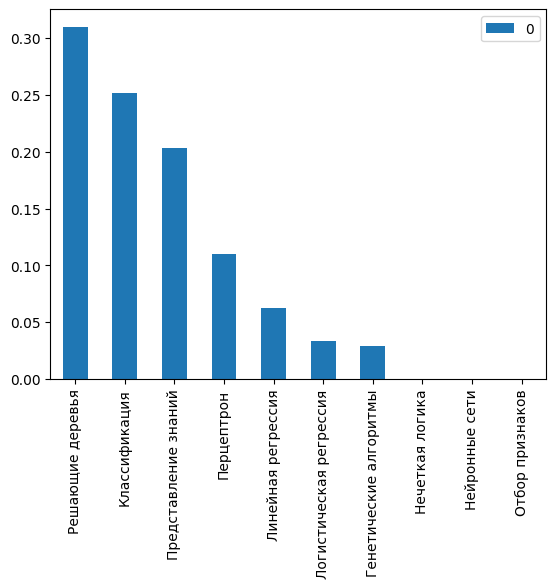

In [ ]:
feature_names = X.columns
print(feature_names)
print(clf.feature_importances_)
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)
print(feature_importance)
features = list(feature_importance[feature_importance[0]>0].index)
print(features)
feature_importance.head(10).plot(kind="bar")

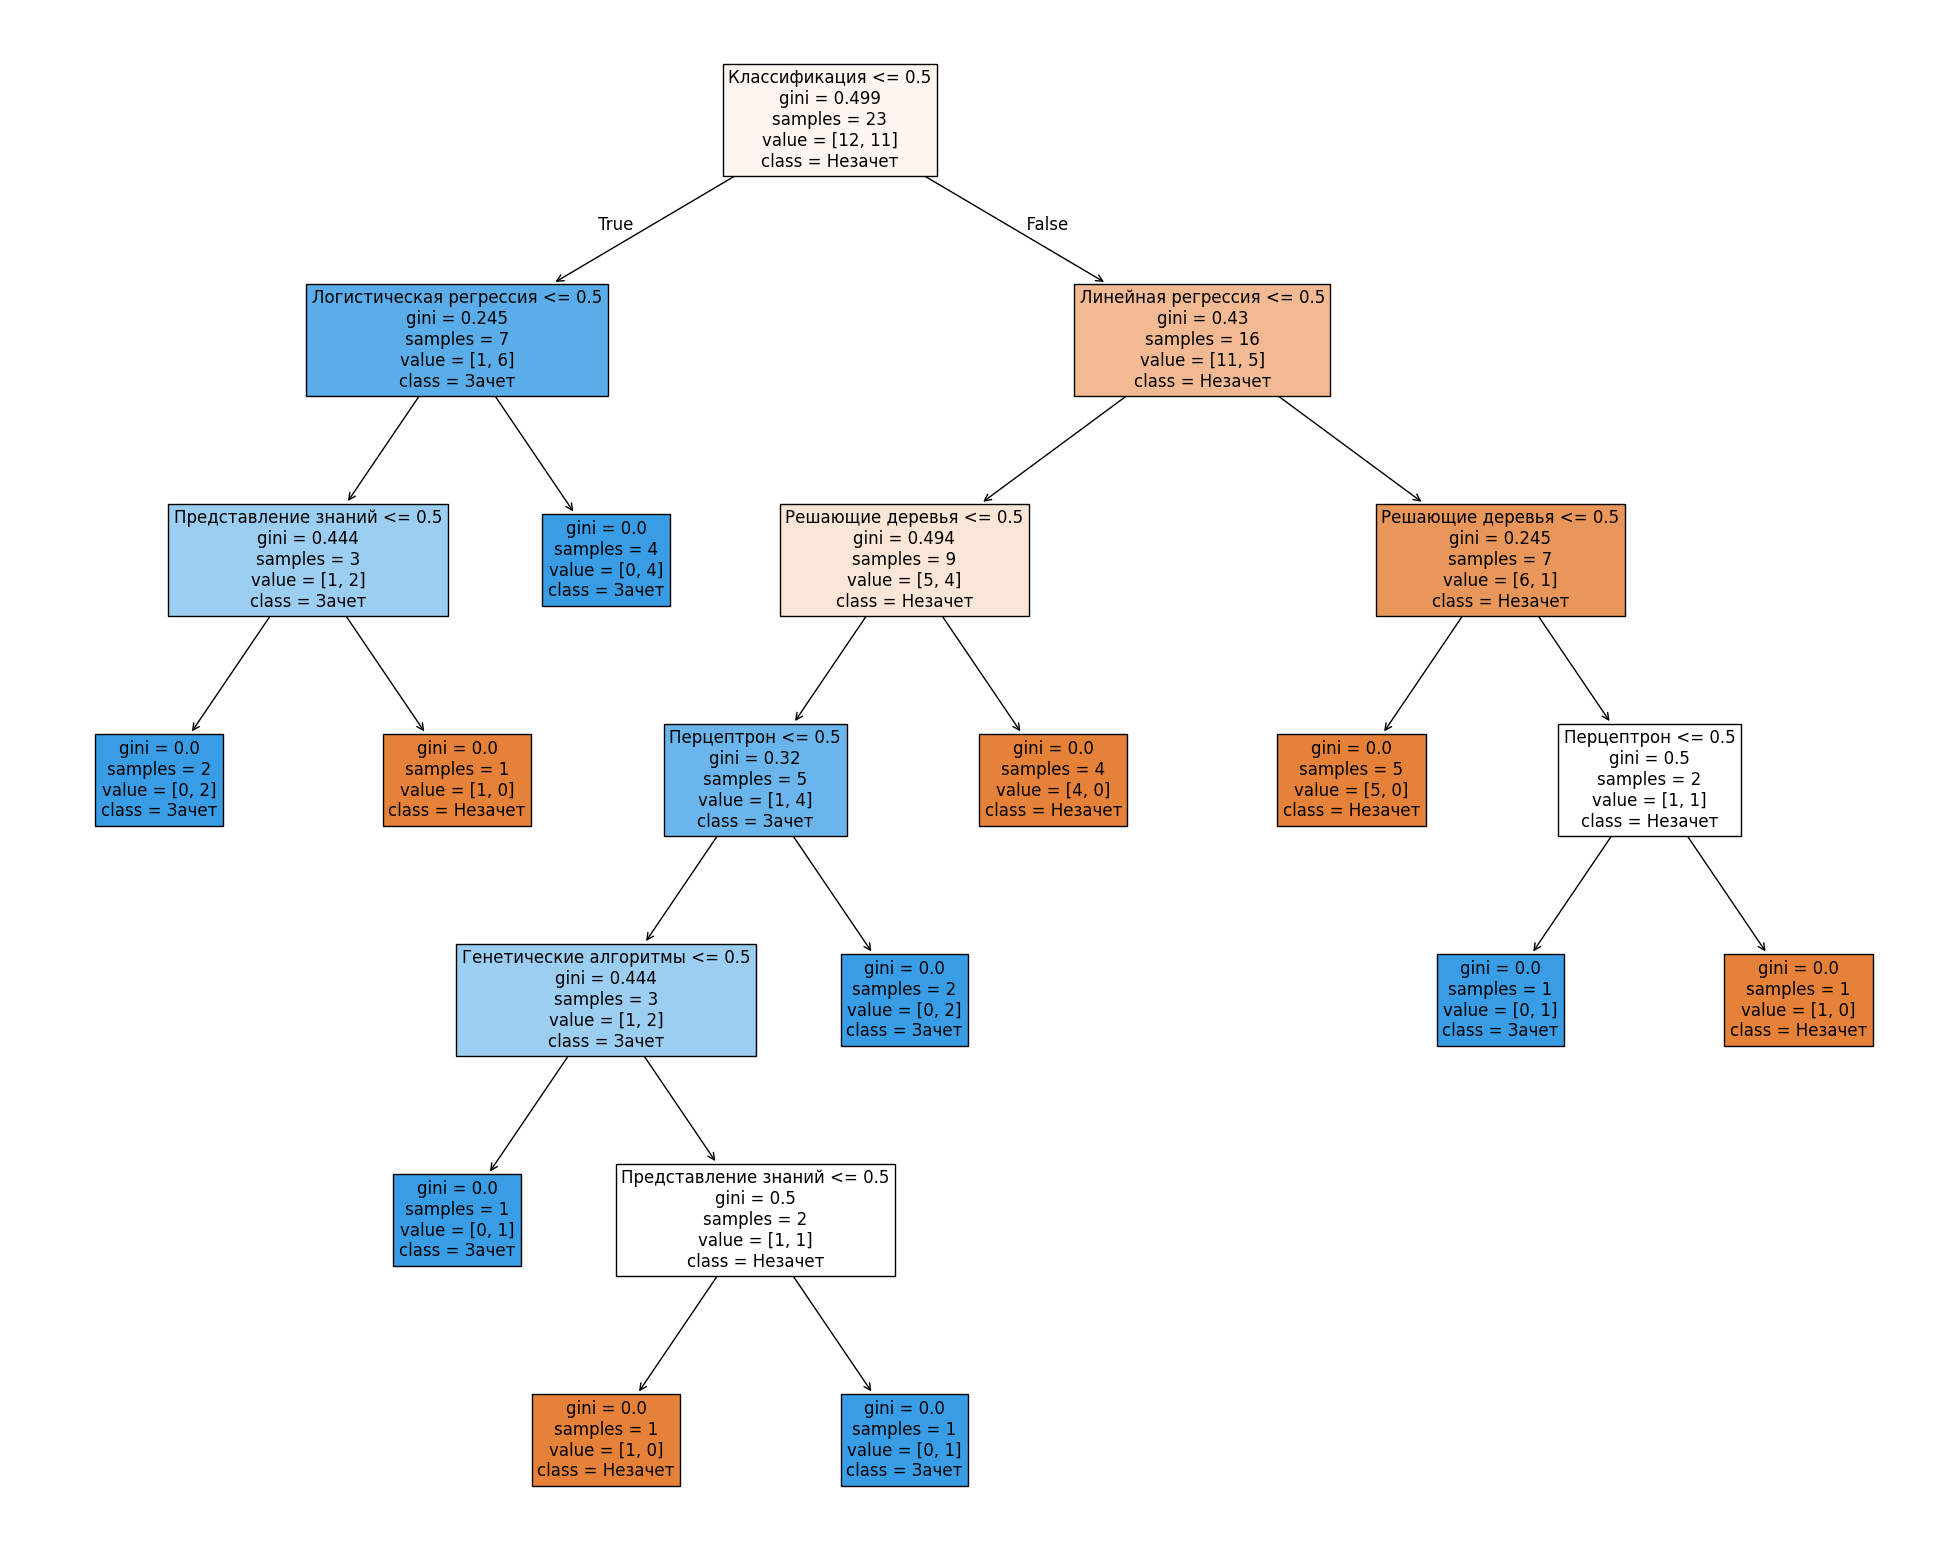

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=feature_names, class_names={0:"Незачет", 1:"Зачет"}, filled=True, fontsize=12)
plt.show()

# Задание №2

В этом задании вам предстоит определять принадлежность точки многоугольнику. Многоугольник приведен в файле `dt-2.png`, координаты вершин подписаны.

Постройте модель на основе дерева решений, которая по координатам произвольной точки будет определять принадлежность этой точки заданному многоугольнику. Визуализируйте результаты любым удобным образом.

0.8933333333333333
[[41  6]
 [ 2 26]]


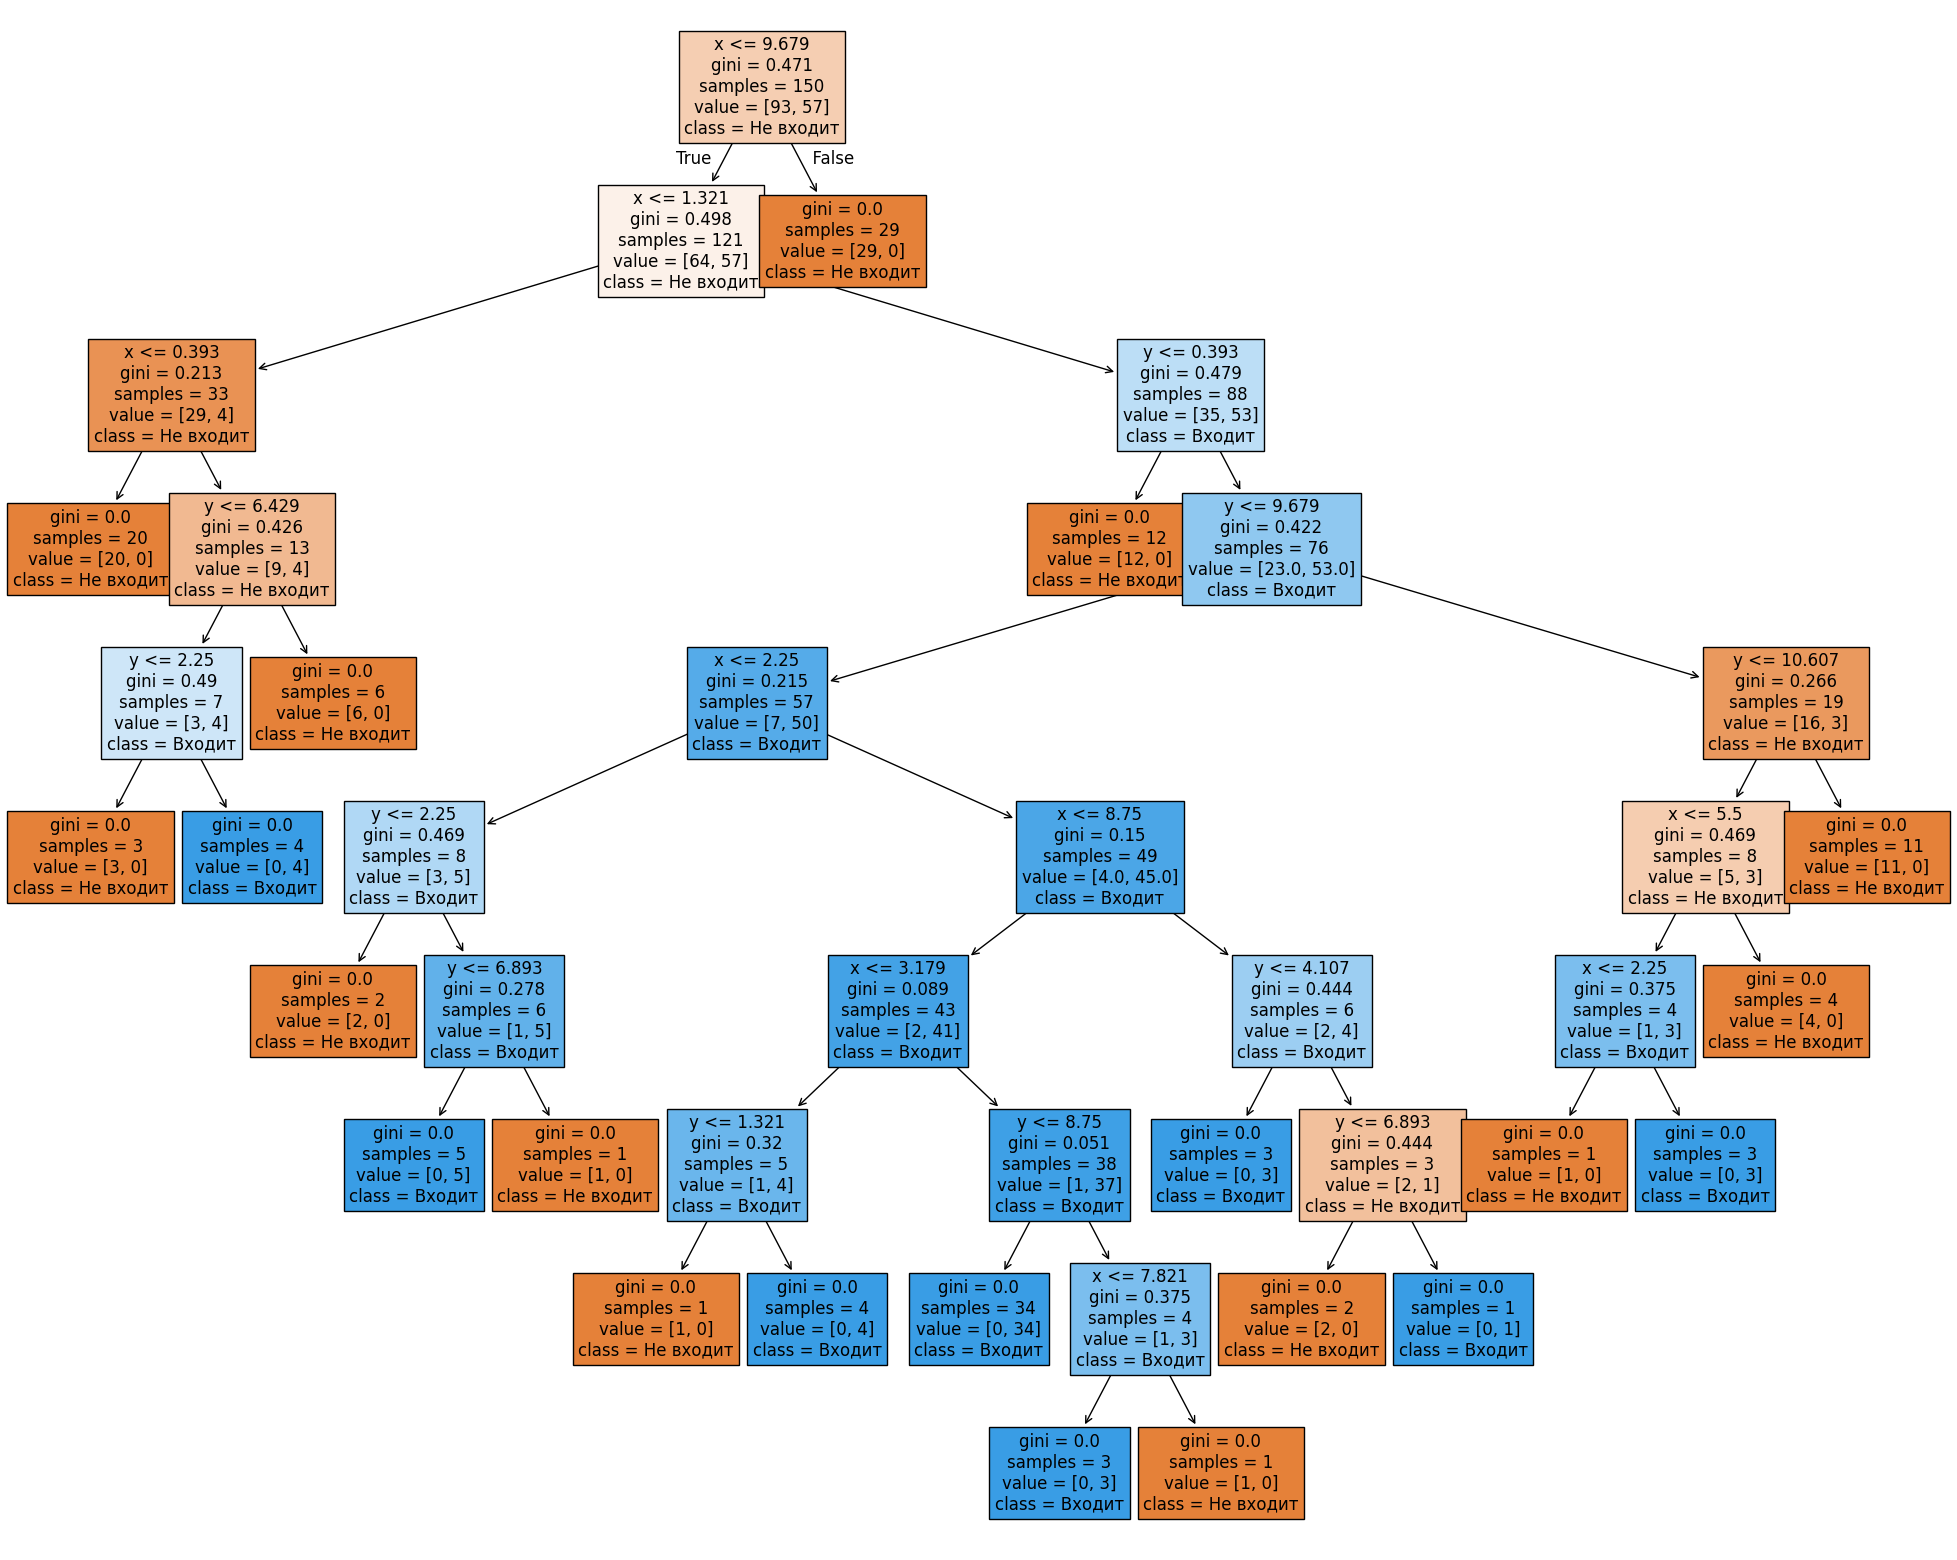

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.path import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

vertices = np.array([(2, 11), (6, 10), (10, 8), (8, 5), (11, 2), (5, 0), (0, 3), (0, 6), (3, 7)])

def is_point_in_polygon(point, vertices):
    polygon_path = Path(vertices)
    return polygon_path.contains_point((float(point[0]), float(point[1])))

X = []
y = []
x_range = np.linspace(-1, 12, 15)
y_range = np.linspace(-1, 12, 15)

for x in x_range:
    for y_val in y_range:
        point = (x, y_val)
        X.append(point)
        y.append(1 if is_point_in_polygon(point, vertices) else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions, labels=[0,1]))

plt.figure(figsize=(25,20))
feature_names = ["x", "y"]
tree.plot_tree(clf, feature_names=feature_names, class_names={0:"Не входит", 1:"Входит"}, filled=True, fontsize=12)
plt.show()